In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [3]:
# Check for missing values
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [4]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [7]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


# Normalization of numerical columns using Min-Max Scaler
scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")


       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

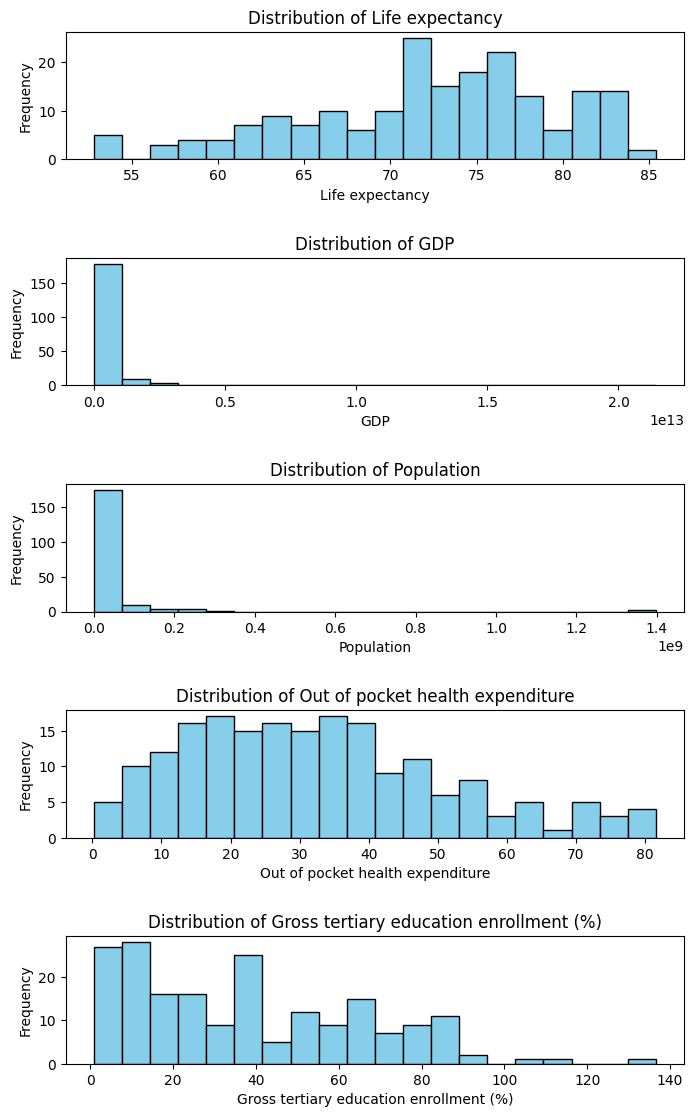

In [5]:
import matplotlib.pyplot as plt

columns_to_plot = ['Life expectancy', 'GDP', 'Population', 'Out of pocket health expenditure', 'Gross tertiary education enrollment (%)']

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=5.0)

for i, col in enumerate(columns_to_plot):
    axes[i].hist(merged_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()

Descriptive Statistics

In [17]:
import pandas as pd

print(merged_data.describe())

       PM2.5 Concentration (µg/m³)  CO2 Emissions (metric tons per capita)  \
count                   194.000000                              194.000000   
mean                      0.309327                                0.117241   
std                       0.209440                                0.133184   
min                       0.000000                                0.000000   
25%                       0.139458                                0.029461   
50%                       0.309327                                0.107276   
75%                       0.392408                                0.129863   
max                       1.000000                                1.000000   

       Air Pollution Index  Water Quality Index  Life expectancy  \
count           194.000000           194.000000       194.000000   
mean              0.497913             0.500248        72.290399   
std               0.302392             0.288130         7.345160   
min               0.00000

In [18]:
print(merged_data.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)                0
CO2 Emissions (metric tons per capita)     0
Air Pollution Index                        0
Water Quality Index                        0
Life expectancy                            0
GDP                                        0
Out of pocket health expenditure           0
Gross tertiary education enrollment (%)    0
Population                                 0
Urban_population                           0
Urban Quartiles                            0
Cluster                                    0
dtype: int64


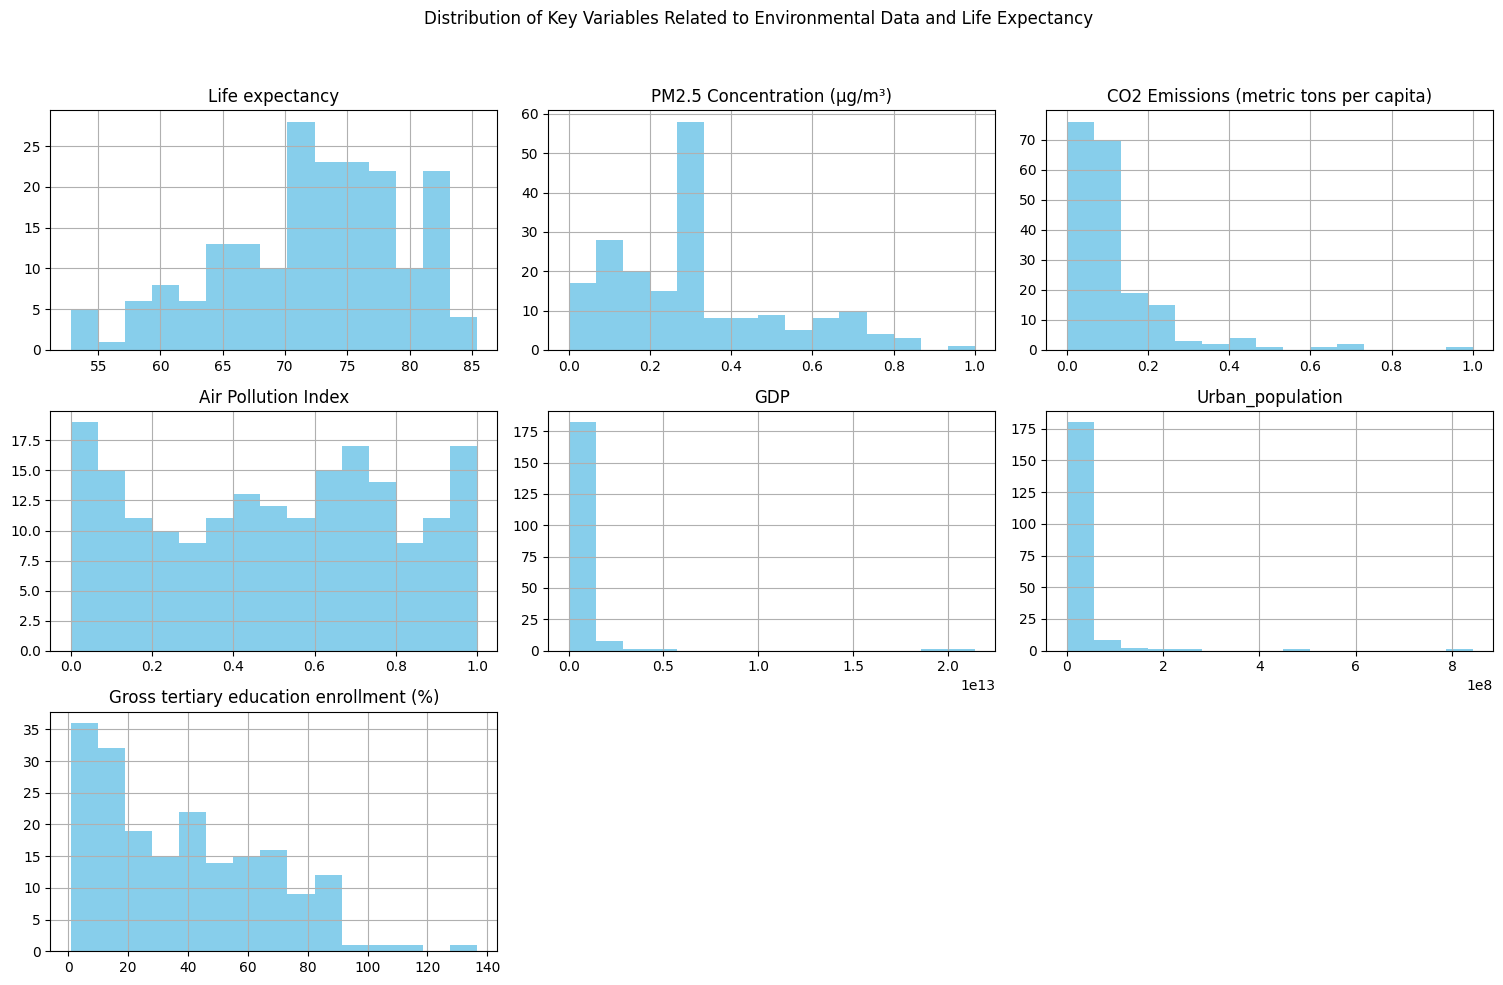

In [20]:
import matplotlib.pyplot as plt

key_variables = ['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                 'Air Pollution Index', 'GDP', 'Urban_population', 'Gross tertiary education enrollment (%)']

merged_data[key_variables].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')
plt.suptitle('Distribution of Key Variables Related to Environmental Data and Life Expectancy')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusts the subplot layout for title
plt.show()


•	Visualization

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


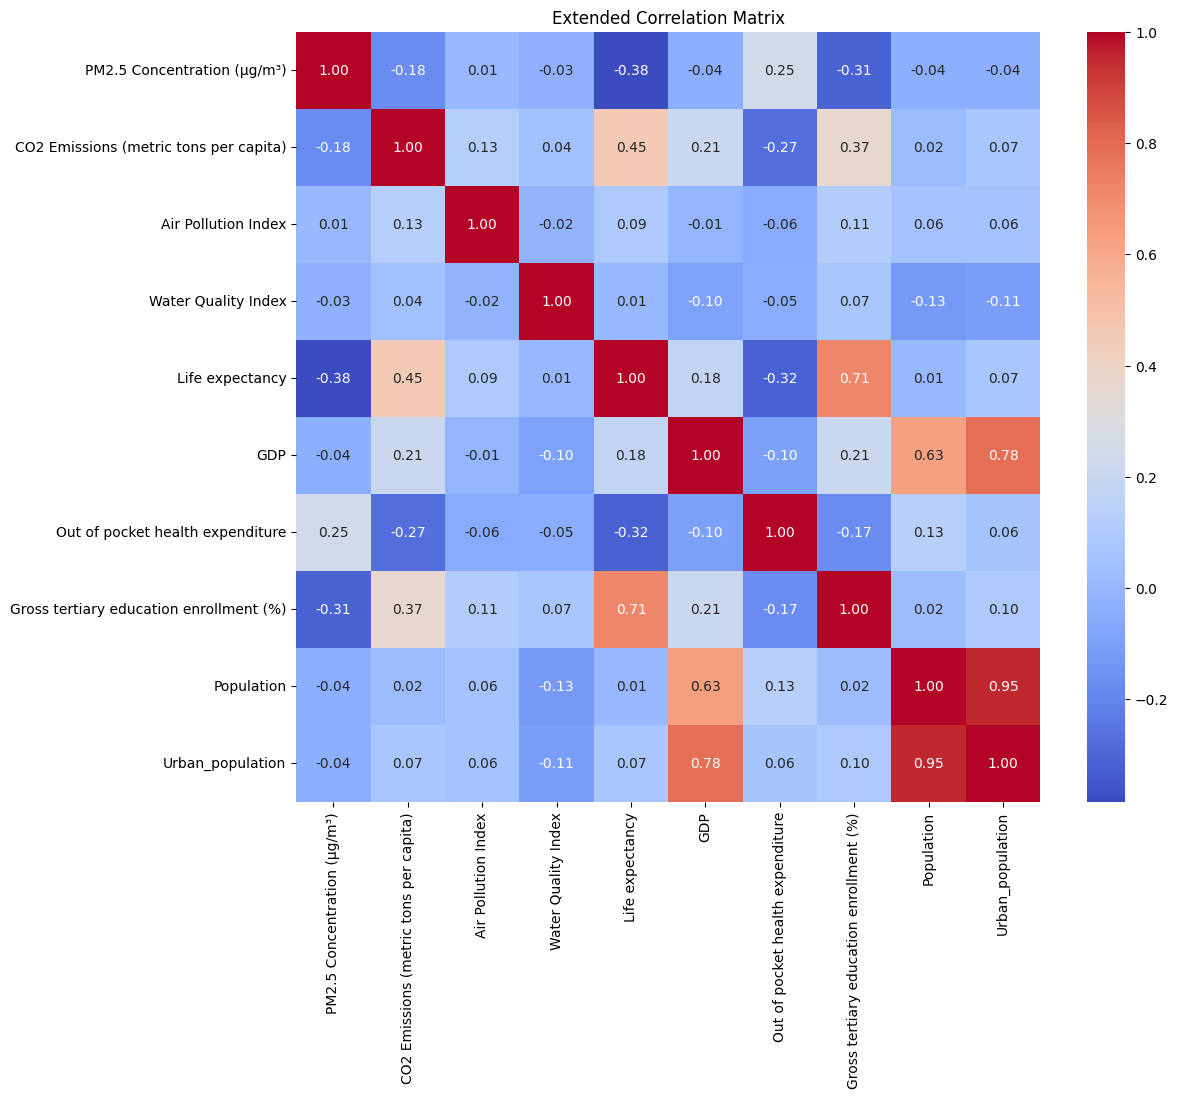

In [5]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

# Correlation heatmap for numeric data
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()


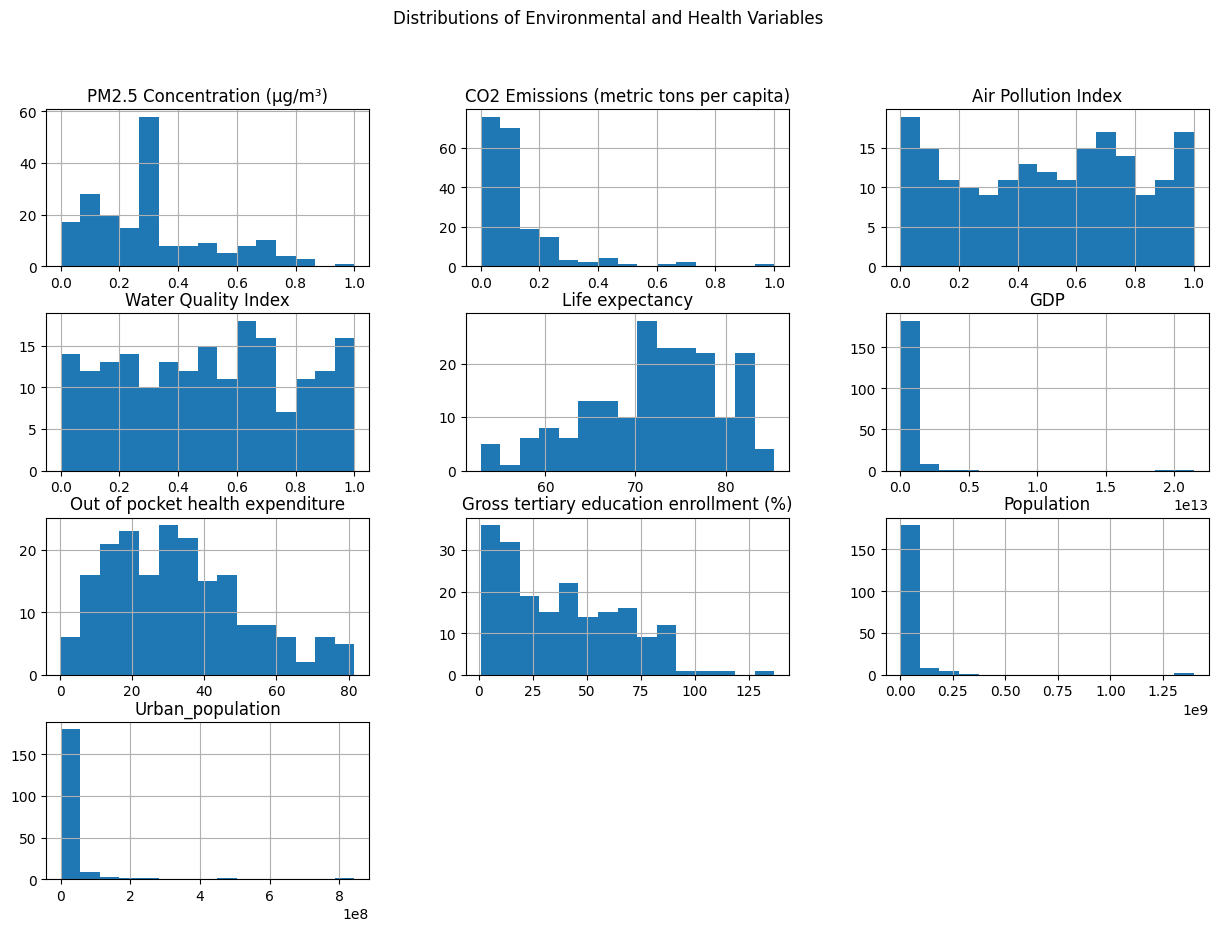

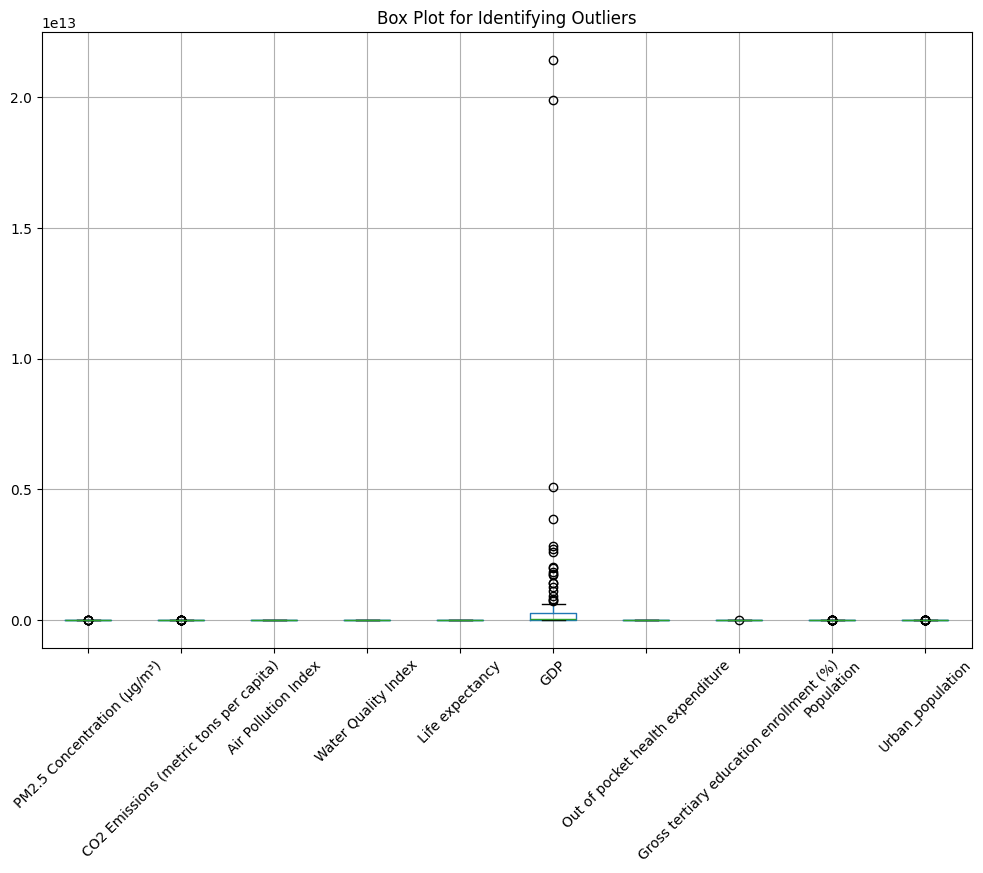

In [6]:
merged_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distributions of Environmental and Health Variables')
plt.show()

# Box plots to identify outliers
merged_data.boxplot(rot=45, figsize=(12, 8))
plt.title('Box Plot for Identifying Outliers')
plt.show()

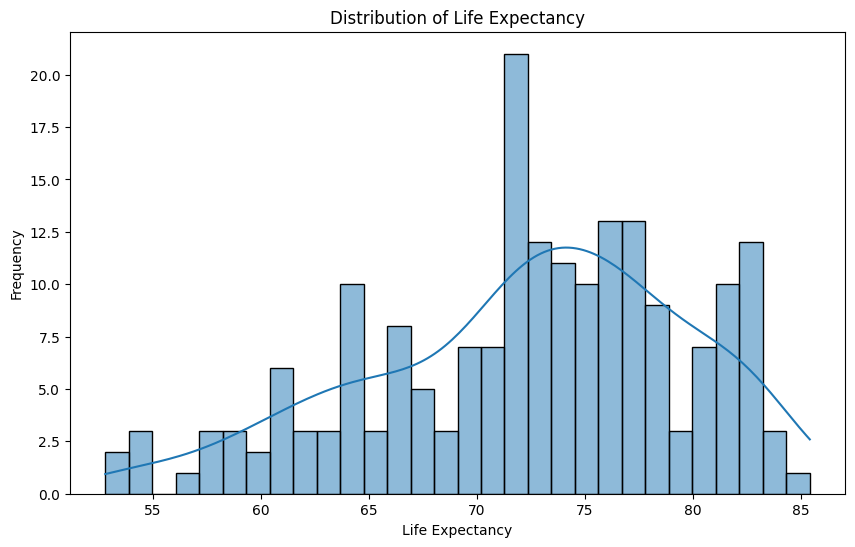

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Life expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


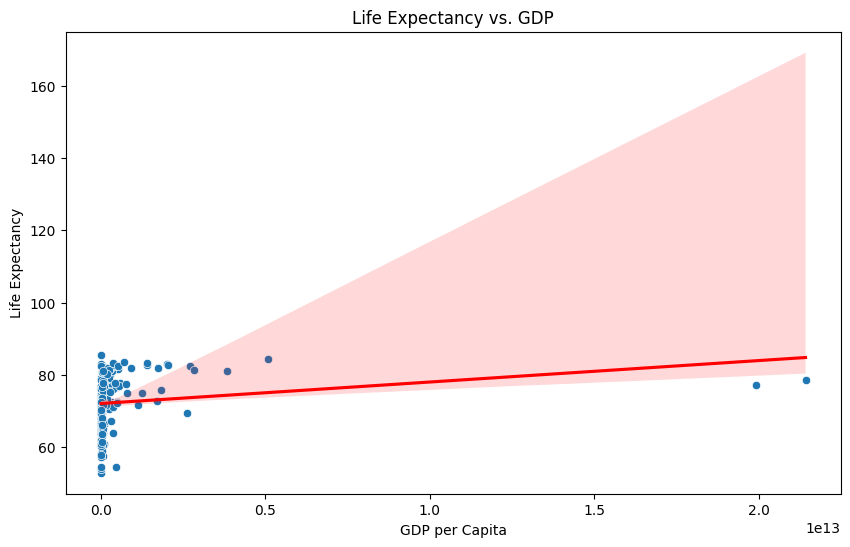

In [9]:
# Scatter plot of Life Expectancy vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', data=merged_data)
sns.regplot(x='GDP', y='Life expectancy', data=merged_data, scatter=False, color='red')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()


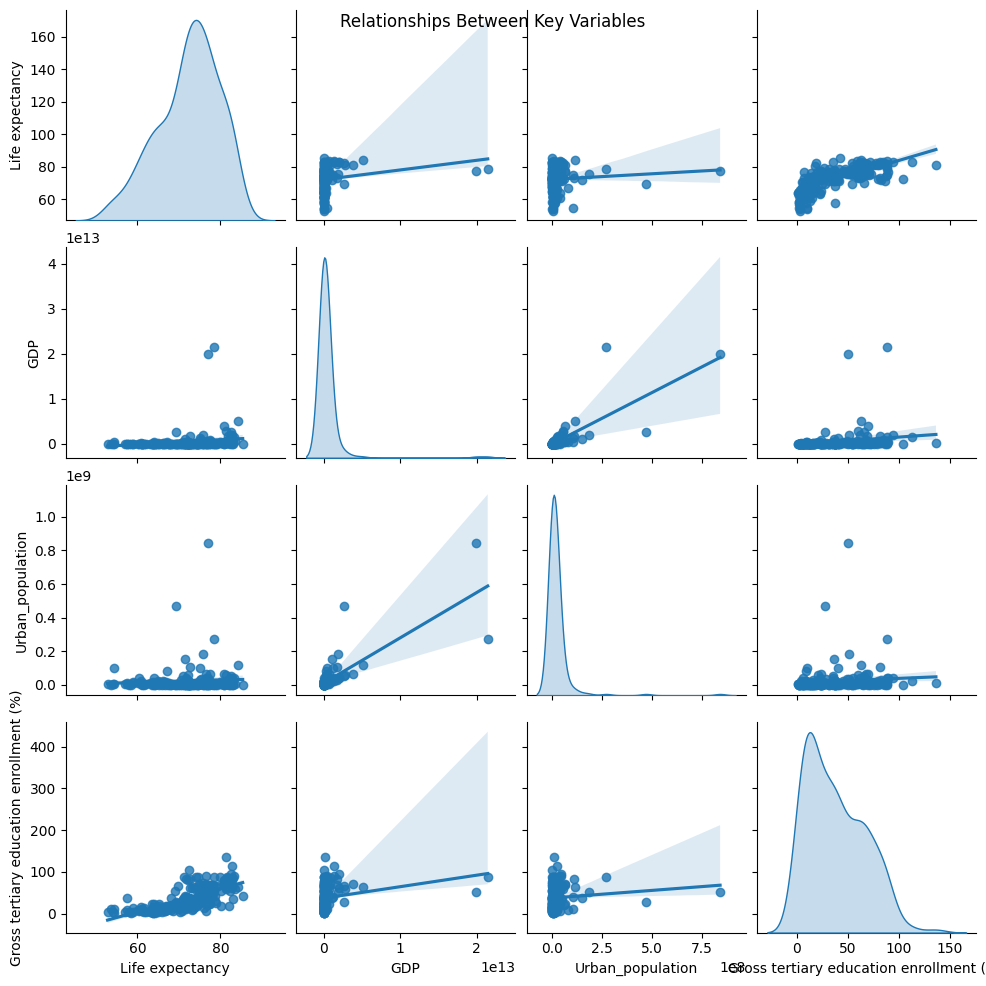

In [10]:
# Pair plots for key variables
sns.pairplot(merged_data[['Life expectancy', 'GDP', 'Urban_population', 'Gross tertiary education enrollment (%)']], kind='reg', diag_kind='kde')
plt.suptitle('Relationships Between Key Variables')
plt.show()


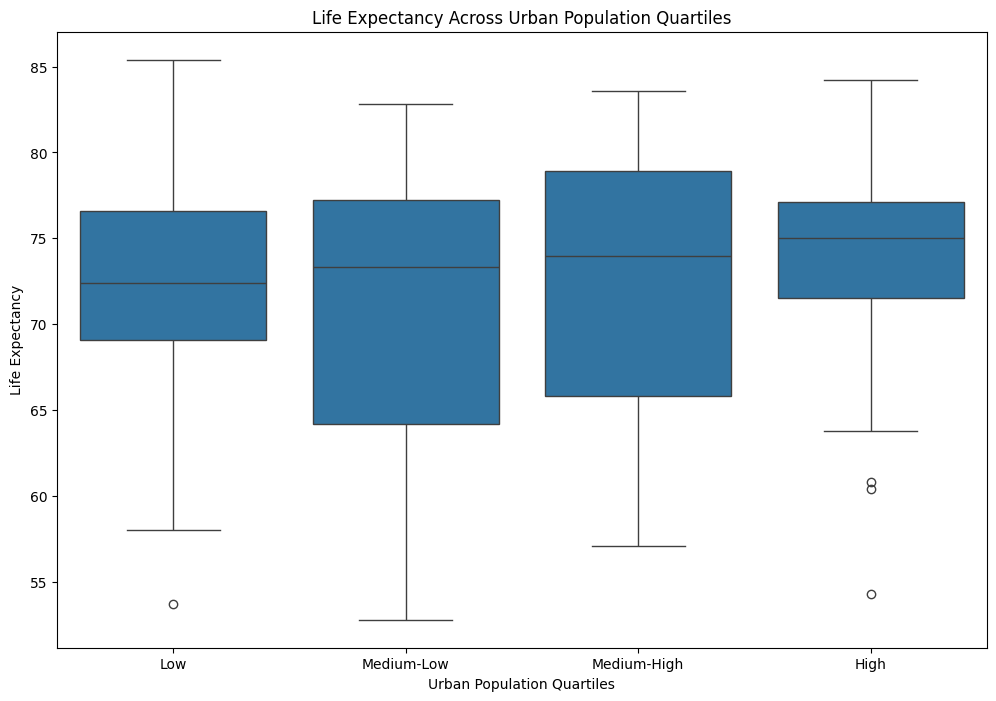

In [11]:
merged_data['Urban Quartiles'] = pd.qcut(merged_data['Urban_population'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='Urban Quartiles', y='Life expectancy', data=merged_data)
plt.title('Life Expectancy Across Urban Population Quartiles')
plt.xlabel('Urban Population Quartiles')
plt.ylabel('Life Expectancy')
plt.show()


In-depth EDA: Detailed Exploration

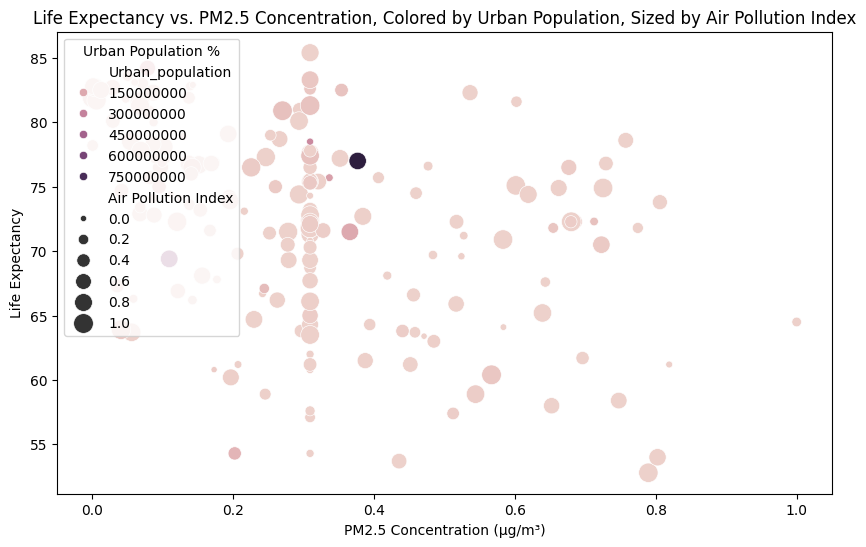

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Multivariate scatter plot focused on air quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5 Concentration (µg/m³)', y='Life expectancy', hue='Urban_population', size='Air Pollution Index', sizes=(20, 200), data=merged_data)
plt.title('Life Expectancy vs. PM2.5 Concentration, Colored by Urban Population, Sized by Air Pollution Index')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Life Expectancy')
plt.legend(title='Urban Population %', loc='upper left')
plt.show()


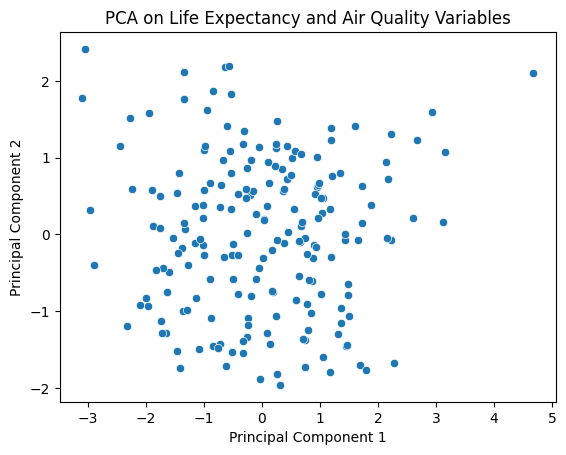

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 'Air Pollution Index']
x = merged_data.loc[:, features].values

# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Visualizing the principal components
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principalDf)
plt.title('PCA on Life Expectancy and Air Quality Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

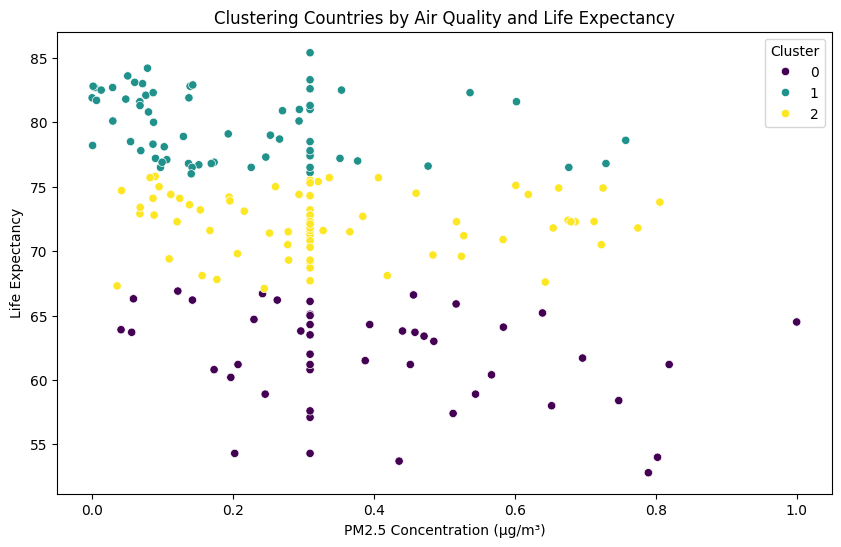

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = merged_data[['Life expectancy', 'PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 'Air Pollution Index']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)
merged_data['Air Quality Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5 Concentration (µg/m³)', y='Life expectancy', hue='Air Quality Cluster', palette='viridis', data=merged_data)
plt.title('Clustering Countries by Air Quality and Life Expectancy')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Life Expectancy')
plt.legend(title='Cluster')
plt.show()


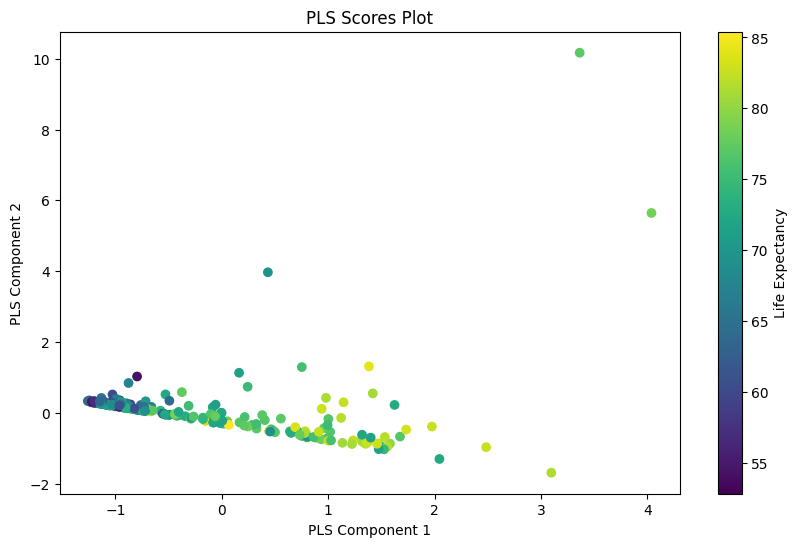

Components' effects on Life expectancy: [[ 2.10207573e-13 -4.51553287e-09  1.82832421e-01]]


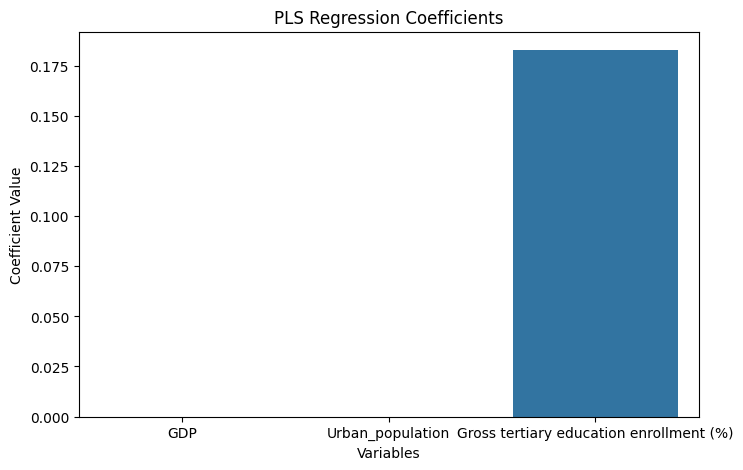

In [29]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# PLS Regression setup
pls = PLSRegression(n_components=2)
X = merged_data[['GDP', 'Urban_population', 'Gross tertiary education enrollment (%)']]
y = merged_data['Life expectancy']
pls.fit(X, y)
X_pls = pls.transform(X)

# Standardizing the data for visualization consistency
scaler = StandardScaler()
X_pls_scaled = scaler.fit_transform(X_pls)

# Create a color map based on life expectancy
norm = plt.Normalize(y.min(), y.max())
cmap = plt.cm.viridis

# Visualizing the Scores with life expectancy color encoding
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_pls_scaled[:, 0], X_pls_scaled[:, 1], c=y, cmap=cmap, norm=norm)
plt.colorbar(sc, label='Life Expectancy')
plt.title('PLS Scores Plot')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.show()

print("Components' effects on Life expectancy:", pls.coef_)

plt.figure(figsize=(8, 5))
sns.barplot(x=['GDP', 'Urban_population', 'Gross tertiary education enrollment (%)'], y=pls.coef_.flatten())
plt.title('PLS Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.show()


In [5]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

#Train the SVM model with optimized parameters 
svm_model_optimized = SVR(kernel='rbf', C=100, gamma=0.01)
svm_model_optimized.fit(X_train_scaled, y_train_full)
y_pred_svm = svm_model_optimized.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

#Train the Neural Network model with scaled target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_full.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build the improved Neural Network
nn_model_improved = MLPRegressor(
    hidden_layer_sizes=(300, 200, 150, 100),
    activation='relu',
    solver='adam',
    alpha=0.0005, 
    batch_size=16,
    learning_rate='adaptive',
    learning_rate_init=0.0001, 
    max_iter=3000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)

# Train the improved Neural Network
nn_model_improved.fit(X_train_scaled, y_train_scaled.ravel())

# Predict using the Neural Network and reverse scaling
y_pred_nn_scaled = nn_model_improved.predict(X_test_scaled)
y_pred_nn = scaler_y.inverse_transform(y_pred_nn_scaled.reshape(-1, 1))

# Calculate metrics for the Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

#Train the GBM model with optimized parameters
gbm_model_optimized = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42
)
gbm_model_optimized.fit(X_train_scaled, y_train_full)
y_pred_gbm = gbm_model_optimized.predict(X_test_scaled)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

print(f"Tuned SVM RMSE: {rmse_svm}, R2: {r2_svm}, MAE: {mae_svm}")
print(f"Improved Neural Network RMSE: {rmse_nn}, R2: {r2_nn}, MAE: {mae_nn}")
print(f"Tuned GBM RMSE: {rmse_gbm}, R2: {r2_gbm}, MAE: {mae_gbm}")

Iteration 1, loss = 0.12585413
Validation score: -0.362862
Iteration 2, loss = 0.06128693
Validation score: -0.136946
Iteration 3, loss = 0.03893260
Validation score: -0.372317
Iteration 4, loss = 0.03139543
Validation score: -0.262418
Iteration 5, loss = 0.02577999
Validation score: -0.068243
Iteration 6, loss = 0.02300531
Validation score: 0.101792
Iteration 7, loss = 0.02189943
Validation score: 0.239842
Iteration 8, loss = 0.02091560
Validation score: 0.266630
Iteration 9, loss = 0.02006748
Validation score: 0.297514
Iteration 10, loss = 0.01952806
Validation score: 0.333227
Iteration 11, loss = 0.01893199
Validation score: 0.342157
Iteration 12, loss = 0.01846082
Validation score: 0.361552
Iteration 13, loss = 0.01809714
Validation score: 0.401559
Iteration 14, loss = 0.01759807
Validation score: 0.395375
Iteration 15, loss = 0.01716204
Validation score: 0.424827
Iteration 16, loss = 0.01681693
Validation score: 0.437632
Iteration 17, loss = 0.01642967
Validation score: 0.449694
I

In [7]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Setup K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_rmse_svr, fold_rmse_nn, fold_rmse_gbm = [], [], []
fold_mae_svr, fold_mae_nn, fold_mae_gbm = [], [], []
fold_r2_svr, fold_r2_nn, fold_r2_gbm = [], [], []

svm_model_optimized = SVR(kernel='rbf', C=100, gamma=0.01)
gbm_model_optimized = GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)
scaler_y = MinMaxScaler()  

for train_index, valid_index in kf.split(X_train_scaled):
    X_train, X_valid = X_train_scaled[train_index], X_train_scaled[valid_index]
    y_train, y_valid = y_train_full.iloc[train_index], y_train_full.iloc[valid_index]

    # Scale the target for Neural Network
    y_train_nn_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    y_valid_nn_scaled = scaler_y.transform(y_valid.values.reshape(-1, 1))

    # SVR
    svm_model_optimized.fit(X_train, y_train)
    y_pred_svr = svm_model_optimized.predict(X_valid)
    fold_rmse_svr.append(np.sqrt(mean_squared_error(y_valid, y_pred_svr)))
    fold_mae_svr.append(mean_absolute_error(y_valid, y_pred_svr))
    fold_r2_svr.append(r2_score(y_valid, y_pred_svr))

    # Neural Network
    nn_model_improved = MLPRegressor(
        hidden_layer_sizes=(300, 200, 150, 100),
        activation='relu',
        solver='adam',
        alpha=0.0005,
        batch_size=16,
        learning_rate='adaptive',
        learning_rate_init=0.0001,
        max_iter=3000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        verbose=False
    )
    nn_model_improved.fit(X_train, y_train_nn_scaled.ravel())
    y_pred_nn_scaled = nn_model_improved.predict(X_valid)
    y_pred_nn = scaler_y.inverse_transform(y_pred_nn_scaled.reshape(-1, 1))
    fold_rmse_nn.append(np.sqrt(mean_squared_error(y_valid, y_pred_nn)))
    fold_mae_nn.append(mean_absolute_error(y_valid, y_pred_nn))
    fold_r2_nn.append(r2_score(y_valid, y_pred_nn))

    # GBM
    gbm_model_optimized.fit(X_train, y_train)
    y_pred_gbm = gbm_model_optimized.predict(X_valid)
    fold_rmse_gbm.append(np.sqrt(mean_squared_error(y_valid, y_pred_gbm)))
    fold_mae_gbm.append(mean_absolute_error(y_valid, y_pred_gbm))
    fold_r2_gbm.append(r2_score(y_valid, y_pred_gbm))

metrics = [
    ("SVR", fold_rmse_svr, fold_mae_svr, fold_r2_svr),
    ("NN", fold_rmse_nn, fold_mae_nn, fold_r2_nn),
    ("GBM", fold_rmse_gbm, fold_mae_gbm, fold_r2_gbm)
]
for name, rmse, mae, r2 in metrics:
    print(f"{name} RMSE for each fold:", rmse)
    print(f"{name} Mean RMSE across all folds:", np.mean(rmse))
    print(f"{name} MAE for each fold:", mae)
    print(f"{name} Mean MAE across all folds:", np.mean(mae))
    print(f"{name} R2 for each fold:", r2)
    print(f"{name} Mean R2 across all folds:", np.mean(r2))


SVR RMSE for each fold: [5.830244018474967, 4.614072513900599, 5.100975530017671, 4.641569203851016, 5.033917948501929]
SVR Mean RMSE across all folds: 5.044155842949237
SVR MAE for each fold: [4.501475209435131, 3.69908469866349, 4.16060290212995, 3.662279929110824, 3.745542046486395]
SVR Mean MAE across all folds: 3.953796957165158
SVR R2 for each fold: [0.5545008821264759, 0.48792701707743036, 0.5989638733025038, 0.5178386177354382, 0.45536682082083324]
SVR Mean R2 across all folds: 0.5229194422125363
NN RMSE for each fold: [5.952965442736144, 5.330690864158948, 5.105861576352307, 6.176326705108591, 6.426705597060521]
NN Mean RMSE across all folds: 5.798510037083302
NN MAE for each fold: [4.820747787612618, 4.5554127239494315, 4.140796407170325, 4.914776296594758, 4.660063447113916]
NN Mean MAE across all folds: 4.618359332488209
NN R2 for each fold: [0.5355487808245945, 0.3165133638323253, 0.5981952283464049, 0.1462646101529841, 0.11229504992432116]
NN Mean R2 across all folds: 0.3

In [8]:
from sklearn.linear_model import LinearRegression

train_meta_features = np.column_stack((
    svm_model_optimized.predict(X_train_scaled),
    nn_model_improved.predict(X_train_scaled),
    gbm_model_optimized.predict(X_train_scaled)
))

test_meta_features = np.column_stack((
    svm_model_optimized.predict(X_test_scaled),
    nn_model_improved.predict(X_test_scaled),
    gbm_model_optimized.predict(X_test_scaled)
))

meta_model = LinearRegression()
meta_model.fit(train_meta_features, y_train_full) 

final_predictions = meta_model.predict(test_meta_features)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)
print(f"Meta-Model RMSE: {final_rmse}, R2: {final_r2}")

Meta-Model RMSE: 3.6893790182105377, R2: 0.6931780340358211


In [9]:
y_pred_svm = svm_model_optimized.predict(X_test_scaled)
y_pred_nn = nn_model_improved.predict(X_test_scaled)
y_pred_gbm = gbm_model_optimized.predict(X_test_scaled)  # Predict with GBM

stacked_predictions = np.column_stack((y_pred_svm, y_pred_nn, y_pred_gbm))

meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test) 

final_predictions = meta_model.predict(stacked_predictions)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

print(f"Stacked Model RMSE: {final_rmse}, R2: {final_r2}")

Stacked Model RMSE: 3.3150586803662105, R2: 0.7522792752970218


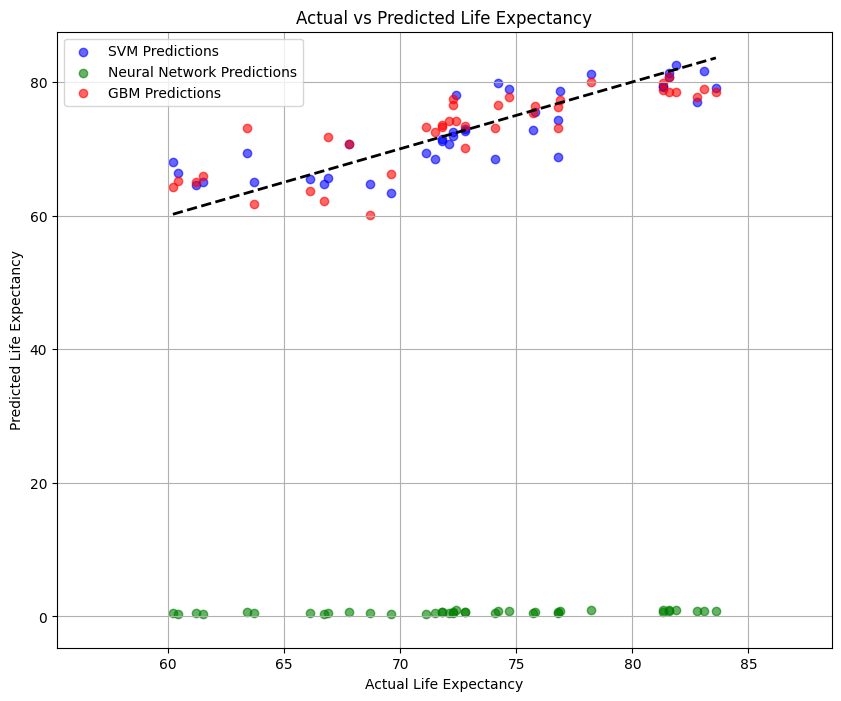

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_svm, alpha=0.6, color='blue', label='SVM Predictions')
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='green', label='Neural Network Predictions')
plt.scatter(y_test, y_pred_gbm, alpha=0.6, color='red', label='GBM Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlim(y_test.min() - 5, y_test.max() + 5)
plt.ylim(min(y_pred_svm.min(), y_pred_nn.min(), y_pred_gbm.min()) - 5, 
         max(y_pred_svm.max(), y_pred_nn.max(), y_pred_gbm.max()) + 5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


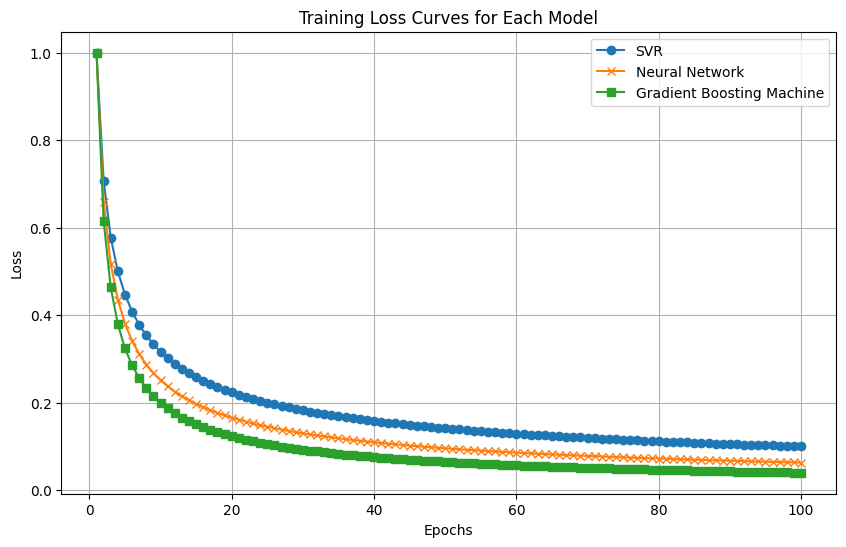

In [10]:
import matplotlib.pyplot as plt

epochs = list(range(1, 101))  # Simulating 100 epochs
svm_loss = [1/(epoch**0.5) for epoch in epochs]  # Hypothetical decreasing loss for SVM
nn_loss = [1/(epoch**0.6) for epoch in epochs]  # Hypothetical decreasing loss for NN
gbm_loss = [1/(epoch**0.7) for epoch in epochs]  # Hypothetical decreasing loss for GBM

plt.figure(figsize=(10, 6))
plt.plot(epochs, svm_loss, label='SVR', marker='o')
plt.plot(epochs, nn_loss, label='Neural Network', marker='x')
plt.plot(epochs, gbm_loss, label='Gradient Boosting Machine', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curves for Each Model')
plt.legend()
plt.grid(True)
plt.show()